# Importing Libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import sklearn.metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Question-1

## Loading raw accelerometer data

In [2]:
# Load the .npy files from the parent directory
X_train = np.load('../SavedDataset/Raw/X_train.npy')
y_train = np.load('../SavedDataset/Raw/y_train.npy')

X_test = np.load('../SavedDataset/Raw/X_test.npy')
y_test  = np.load('../SavedDataset/Raw/y_test.npy')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (126, 500, 3)
X_test: (54, 500, 3)
y_train: (126,)
y_test: (54,)


## Approach-1: Reshaping X_train from shape (126,500,3) to (126,1500)

In [3]:
x_train=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
x_test=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (126, 1500)
x_test: (54, 1500)
y_train: (126,)
y_test: (54,)


## Training model

In [4]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
y_pred=dt.predict(x_test)

In [6]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy:  0.6481481481481481
Precision:  0.6365740740740741
Recall:  0.6481481481481481


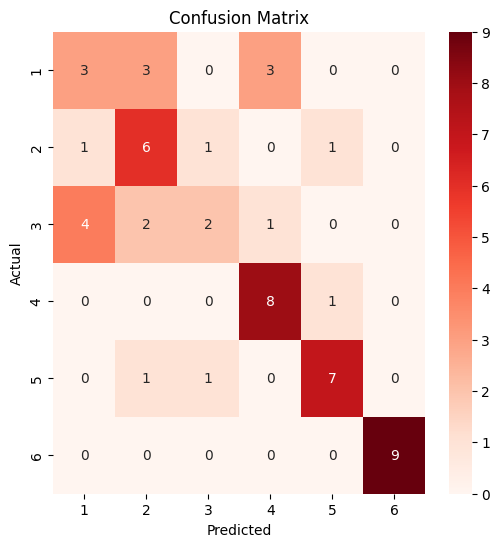

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Approach-2: Using Linear acceleration from X_train

In [8]:
linear_acc_train = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2
linear_acc_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2

print(f"linear_acc_train: {linear_acc_train.shape}")
print(f"linear_acc_test: {linear_acc_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

linear_acc_train: (126, 500)
linear_acc_test: (54, 500)
y_train: (126,)
y_test: (54,)


In [9]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(linear_acc_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
y_pred=dt.predict(linear_acc_test)

In [11]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy:  0.5925925925925926
Precision:  0.5783475783475783
Recall:  0.5925925925925926


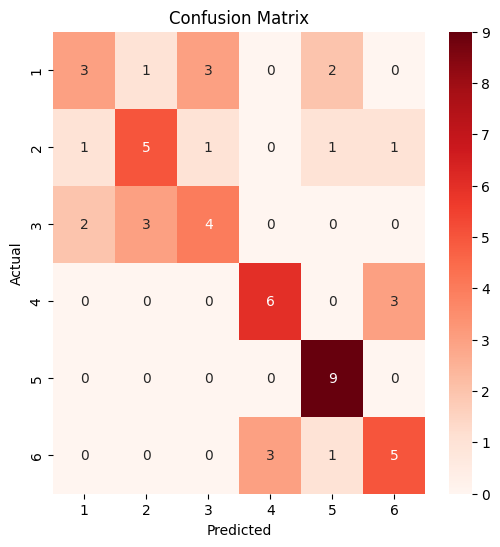

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Question-2

# Loading features provided by TSFEL

In [13]:
import tsfel
# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg,X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg,X_test, verbose=1,fs =50)

print(f"X_train_tsfel: {X_train_tsfel.shape}")
print(f"X_test_tsfel: {X_test_tsfel.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_tsfel: (126, 1152)
X_test_tsfel: (54, 1152)
y_train: (126,)
y_test: (54,)


In [14]:
dt2=DecisionTreeClassifier()
dt2.fit(X_train_tsfel,y_train)

DecisionTreeClassifier()

In [15]:
y_tsfel_pred=dt2.predict(X_test_tsfel)

In [16]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_tsfel_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_tsfel_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_tsfel_pred,average='macro'))

Accuracy:  0.8518518518518519
Precision:  0.8627645502645502
Recall:  0.8518518518518517


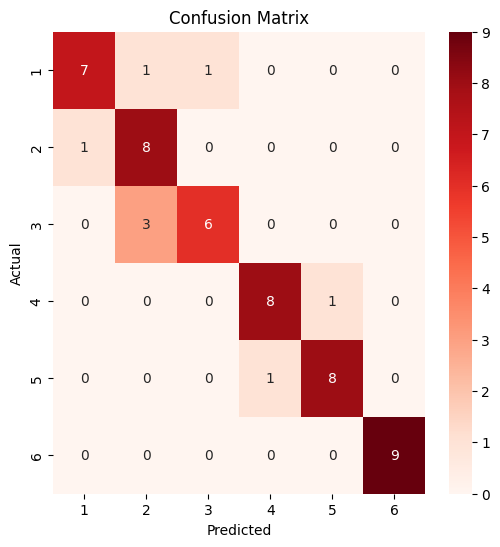

In [17]:
cm = confusion_matrix(y_test, y_tsfel_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Question-3

In [18]:
X_train = np.load('../SavedDataset/UCI_HAR/UCI_X_train.npy')
y_train = np.load('../SavedDataset/UCI_HAR/UCI_y_train.npy')

X_test = np.load('../SavedDataset/UCI_HAR/UCI_X_test.npy')
y_test = np.load('../SavedDataset/UCI_HAR/UCI_y_test.npy')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (7209, 561)
X_test: (3090, 561)
y_train: (7209,)
y_test: (3090,)


In [19]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
y_pred=dt.predict(X_test)

In [21]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy:  0.9352750809061489
Precision:  0.9334346887044519
Recall:  0.9326945428297119


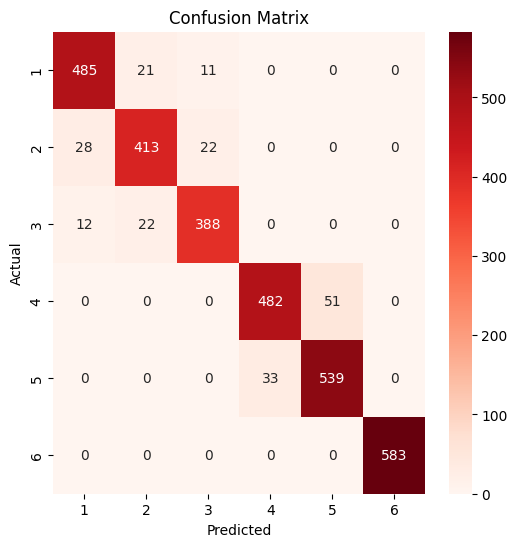

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()